# Breast Cancer Prediction

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Loading the Dataset

In [2]:
# Load breast_cancer dataset
from sklearn.datasets import load_breast_cancer

# Assign it into cancer variable
cancer = load_breast_cancer()

# Show keys
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# Dislay Feature names
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Reading Data

In [4]:
# Create df_feat dataframe using data and feature_names keys of the database
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# Check the head of df_feat
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Understaing Data

In [5]:
# Check the info of df_feat
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
# Display the target names
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
cancer['target']
print("Number of 1st target: ",  (cancer['target'] == 0).sum())
print("Number of 2nd target: ", (cancer['target'] == 1).sum())

Number of 1st target:  212
Number of 2nd target:  357


## Preparing our data for the models and splitting data into train and cv(or test)

In [8]:
#Splitting Data into train and Test sklearn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train_main, X_test, y_train_main, y_test = train_test_split(df_feat,
                                                    cancer['target'],
                                                    stratify= cancer['target'],
                                                    test_size = 0.20)

## Feature Scaling

In [9]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
X_train_main = r_scaler.fit_transform(X_train_main)
X_test = r_scaler.transform(X_test)

# 1. K-NN

##### Model Tuning

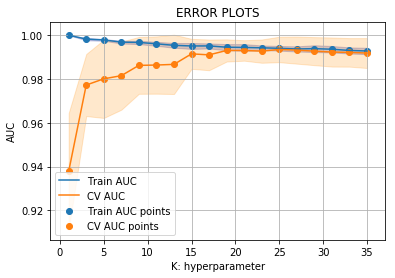

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV
neigh = KNeighborsClassifier()
parameters ={'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]}
model1=GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model1.fit(X_train_main, y_train_main);

train_auc= model1.cv_results_['mean_train_score']
train_auc_std= model1.cv_results_['std_train_score']
cv_auc = model1.cv_results_['mean_test_score'] 
cv_auc_std= model1.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [11]:
K = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
scor = [x for x in cv_auc]
best_K = K[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding k value of cv is:",best_K, '\n')

print("Best k for the model is: ", best_K)

Maximum AUC score of cv is: 0.993498452012384
Corresponding k value of cv is: 25 

Best k for the model is:  25


##### Measuring AUC Score for Test Data

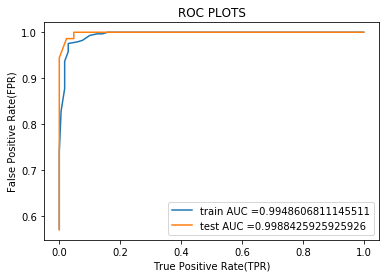

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model1 = KNeighborsClassifier(n_neighbors=best_K,algorithm='brute')
model1.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model1.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

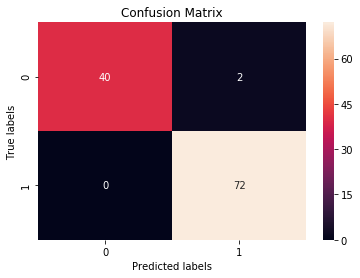

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()

def predict(proba,threshold,fpr,tpr):
    t=threshold[np.argmax(fpr*(1-tpr))]
    print("the maximun value of tpr*(1-fpr)",np.round(max(tpr*(1-fpr)),2) ,"for threshold",np.round(t,2))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


sns.heatmap(confusion_matrix(y_test, model1.predict(X_test)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model1.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      0.95      0.98        42
          1       0.97      1.00      0.99        72

avg / total       0.98      0.98      0.98       114



# 2. Logistic Regression

##### Model Tuning

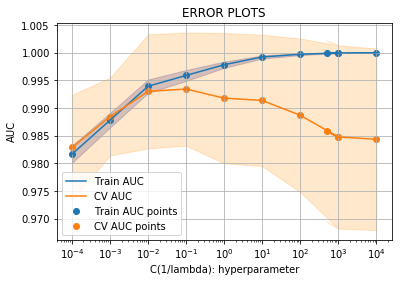

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced');
parameters ={'C':[10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]}
model2=GridSearchCV(lr, parameters, cv=10, scoring='roc_auc',return_train_score=True)
model2.fit(X_train_main, y_train_main)

train_auc= model2.cv_results_['mean_train_score']
train_auc_std= model2.cv_results_['std_train_score']
cv_auc = model2.cv_results_['mean_test_score'] 
cv_auc_std= model2.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [16]:
C = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_C = C[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding C value of cv is:",best_C, '\n')

print("Best C for the Model is: ", best_C)

Maximum AUC score of cv is: 0.9934269729111803
Corresponding C value of cv is: 0.1 

Best C for the Model is:  0.1


##### Measuring AUC Score for Test Data

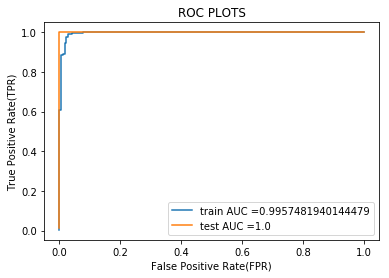

In [17]:
from sklearn.metrics import roc_curve, auc

model2 = LogisticRegression(C=best_C,class_weight='balanced');
model2.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model2.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Classification Report

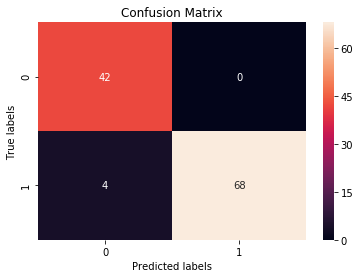

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model2.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95        42
          1       1.00      0.94      0.97        72

avg / total       0.97      0.96      0.97       114



# 3. Decision Tree

##### Model Tuning

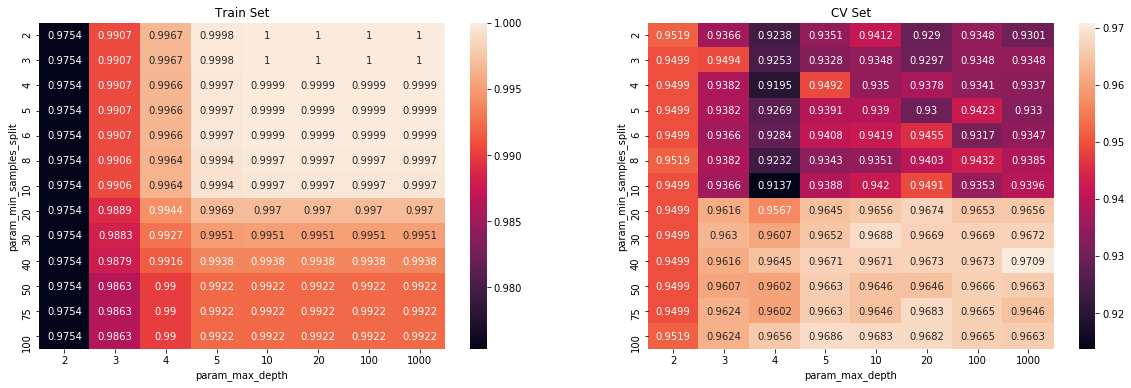

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [2,3,4,5,10,20,100, 1000], 'min_samples_split': [2,3,4,5,6,8, 10,20,30,40,50,75, 100]}
model3 = GridSearchCV(dt, parameters, cv=10, scoring='roc_auc',return_train_score=True)
model3.fit(X_train_main, y_train_main)

max_scores1 = pd.DataFrame(model3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [21]:
print(model3.best_params_)

{'max_depth': 1000, 'min_samples_split': 40}


##### Measuring AUC Score for Test Data

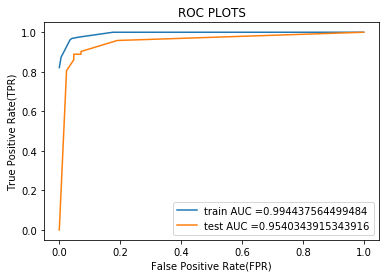

In [22]:
model3 = DecisionTreeClassifier(**model3.best_params_)
model3.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model3.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model3.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

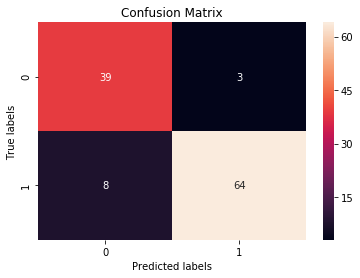

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model3.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model3.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.93      0.88        42
          1       0.96      0.89      0.92        72

avg / total       0.91      0.90      0.90       114



# 4. SVM

### L2 Regularization

##### Model Tuning

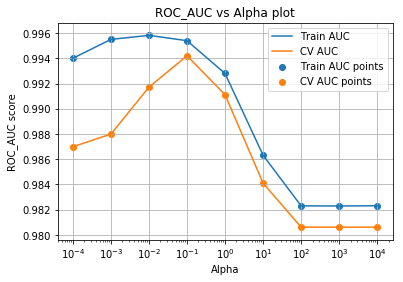

In [25]:
from sklearn.linear_model import SGDClassifier

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sgdc = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
model4 = GridSearchCV(sgdc, parameters, cv= 10, scoring='roc_auc',return_train_score=True)
model4.fit(X_train_main, y_train_main)

train_auc = model4.cv_results_['mean_train_score']
cv_auc= model4.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

In [26]:
alpha = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_alpha = alpha[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding alpha value of cv is:",best_alpha, '\n')

print("Best alpha for the model is: ", best_alpha)

Maximum AUC score of cv is: 0.9942012348706061
Corresponding alpha value of cv is: 0.1 

Best alpha for the model is:  0.1


##### Measuring AUC Score for Test Data

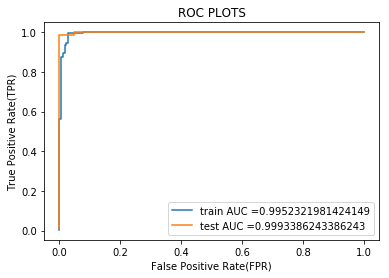

In [27]:
model4 = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced', alpha = best_alpha)
model4.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model4.decision_function(X_train_main)
y_test_pred = model4.decision_function(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_main, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

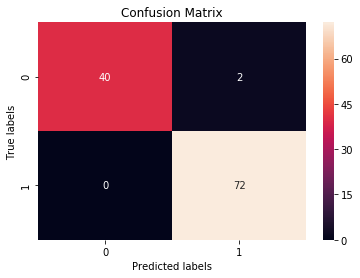

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model4.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model4.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      0.95      0.98        42
          1       0.97      1.00      0.99        72

avg / total       0.98      0.98      0.98       114



### L1 Regularization

##### Model Tuning

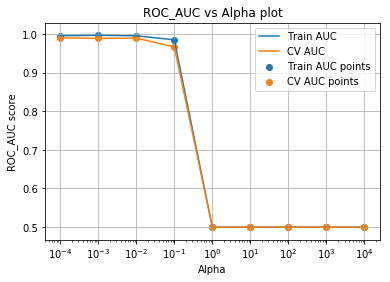

In [30]:
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sgdc = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
model5 = GridSearchCV(sgdc, parameters, cv= 10, scoring='roc_auc',return_train_score=True)
model5.fit(X_train_main, y_train_main)
train_auc = model5.cv_results_['mean_train_score']
cv_auc= model5.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

In [31]:
alpha = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_alpha = alpha[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding alpha value of cv is:",best_alpha, '\n')

print("Best alpha for the model is: ", best_alpha)

Maximum AUC score of cv is: 0.9900673797370408
Corresponding alpha value of cv is: 0.0001 

Best alpha for the model is:  0.0001


##### Measuring AUC Score for Test Data

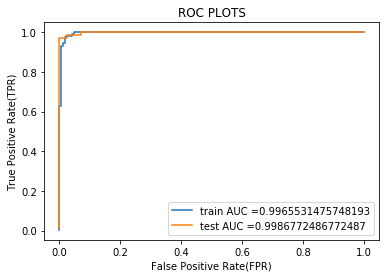

In [32]:
model5 = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced', alpha = best_alpha)
model5.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model5.decision_function(X_train_main)
y_test_pred = model5.decision_function(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_main, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

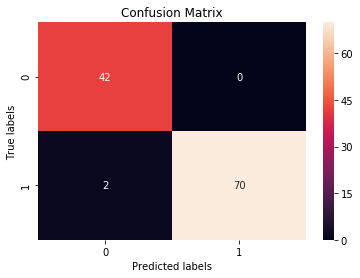

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model5.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model5.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98        42
          1       1.00      0.97      0.99        72

avg / total       0.98      0.98      0.98       114



# 5. Random Forest

##### Model Tuning

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
parameters = {'n_estimators': [300], 'max_depth': [2, 5, 10, 20, None], "max_features": [2,5,10],
              'min_samples_split': [2, 5, 10]}
model6 = GridSearchCV(rf, parameters, cv=4, scoring='roc_auc',return_train_score=True)
model6.fit(X_train_main, y_train_main)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [300], 'max_depth': [2, 5, 10, 20, None], 'max_features': [2, 5, 10], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [36]:
print(model6.best_params_)

{'max_depth': 10, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 300}


##### Measuring AUC Score for Test Data

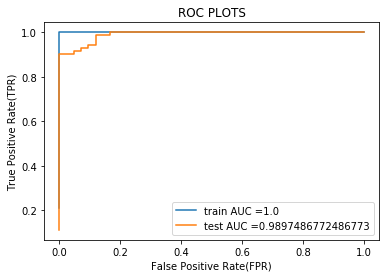

In [37]:
model6 = RandomForestClassifier(**model6.best_params_)
model6.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model6.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model6.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

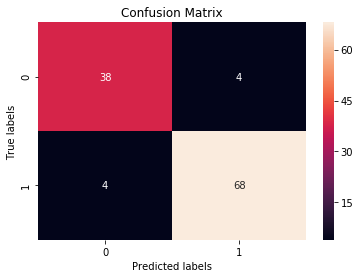

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model6.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model6.predict(X_test)))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90        42
          1       0.94      0.94      0.94        72

avg / total       0.93      0.93      0.93       114



# 6. Gradient Boosting

##### Model Tuning

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
parameters = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [2,5,10],
             "n_estimators": [500],
             "subsample": [1,0.5,0.8]}

model7 = GridSearchCV(gb_model, parameters, cv=4, scoring='roc_auc',return_train_score=True)
model7.fit(X_train_main, y_train_main)

GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.1, 0.01], 'max_depth': [2, 5, 10], 'n_estimators': [500], 'subsample': [1, 0.5, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [41]:
print(model7.best_params_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500, 'subsample': 0.5}


##### Measuring AUC Score for Test Data


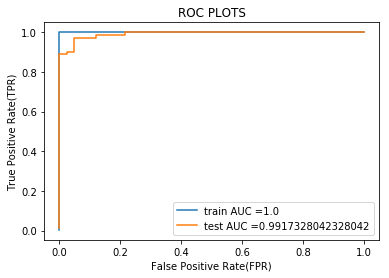

In [42]:
model7 = GradientBoostingClassifier(**model7.best_params_)
model7.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model7.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model7.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

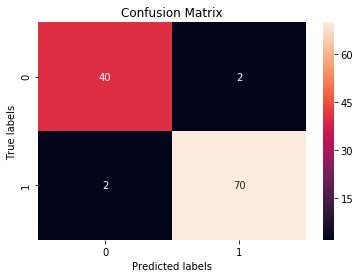

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model7.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model7.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95        42
          1       0.97      0.97      0.97        72

avg / total       0.96      0.96      0.96       114



# 7. Light GBM

##### Model Tuning

In [45]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()
parameters = {"learning_rate": [0.01, 0.05, 0.1],
              "n_estimators": [800],
              "max_depth":[5,8,10],
              "colsample_bytree": [1,0.5,0.3]}

model8 = GridSearchCV(lgbm_model, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model8.fit(X_train_main, y_train_main)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [800], 'max_depth': [5, 8, 10], 'colsample_bytree': [1, 0.5, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [46]:
print(model8.best_params_)

{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 800}


##### Measuring AUC Score for Test Data

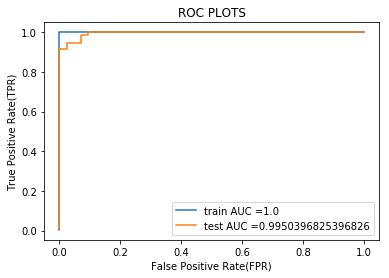

In [47]:
model8 = LGBMClassifier(**model8.best_params_)
model8.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model8.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model8.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


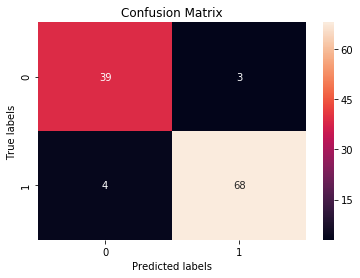

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model8.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model8.predict(X_test)))

             precision    recall  f1-score   support

          0       0.91      0.93      0.92        42
          1       0.96      0.94      0.95        72

avg / total       0.94      0.94      0.94       114



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# 8. XGBoost

##### Model Tuning

In [50]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
parameters = {"learning_rate": [0.1,0.01,1],
             "max_depth": [2,5,8],
             "n_estimators": [800],
             "colsample_bytree": [0.3,0.6,1]}

model9 = GridSearchCV(xgb_model, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model9.fit(X_train_main, y_train_main)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.01, 1], 'max_depth': [2, 5, 8], 'n_estimators': [800], 'colsample_bytree': [0.3, 0.6, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [51]:
print(model9.best_params_)

{'colsample_bytree': 0.3, 'learning_rate': 1, 'max_depth': 5, 'n_estimators': 800}


##### Measuring AUC Score for Test Data

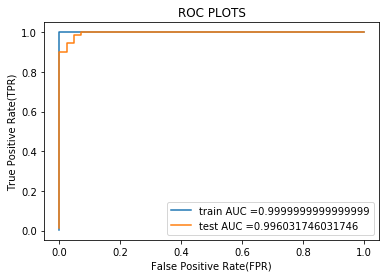

In [52]:
model9 = XGBClassifier(**model9.best_params_)
model9.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model9.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model9.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


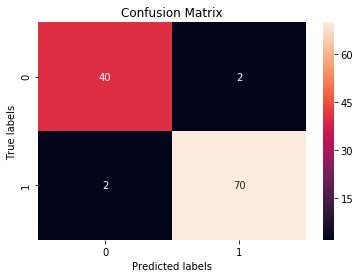

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model9.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model9.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95        42
          1       0.97      0.97      0.97        72

avg / total       0.96      0.96      0.96       114



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



# Conclusion

In [1]:
# Compare all models using Prettytable library
# how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("Model", "AUC Score", "Recall Score")
tb.add_row(["KNN", "0.998", "1.00"])
tb.add_row(["Logistic Regression", "1.0", "0.94"])
tb.add_row(["Decision Tree", "0.954", "0.89"])
tb.add_row(["SVM - L2 Regularization", "0.999", "1.00"])
tb.add_row(["SVM - L1 Regularization", "0.998", "0.97"])
tb.add_row(["Random Forest", "0.989", "0.94"])
tb.add_row(["Gradient Boosting", "0.991", "0.97"])
tb.add_row(["Light GBM", "0.995", "0.94"])
tb.add_row(["XGBoost", "0.996", "0.97"])

print(tb)

+-------------------------+-----------+--------------+
|          Model          | AUC Score | Recall Score |
+-------------------------+-----------+--------------+
|           KNN           |   0.998   |     1.00     |
|   Logistic Regression   |    1.0    |     0.94     |
|      Decision Tree      |   0.954   |     0.89     |
| SVM - L2 Regularization |   0.999   |     1.00     |
| SVM - L1 Regularization |   0.998   |     0.97     |
|      Random Forest      |   0.989   |     0.94     |
|    Gradient Boosting    |   0.991   |     0.97     |
|        Light GBM        |   0.995   |     0.94     |
|         XGBoost         |   0.996   |     0.97     |
+-------------------------+-----------+--------------+
